<a href="https://colab.research.google.com/github/ayushya19/cnn_emotion_re/blob/master/emotiondetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install -q kaggle

from matplotlib import pyplot as plt

In [7]:
!cd ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ./kaggle.json
!kaggle datasets download -d deadskull7/fer2013 --force

 92% 89.0M/96.6M [00:02<00:00, 33.8MB/s]
100% 96.6M/96.6M [00:02<00:00, 49.0MB/s]


In [8]:
from google.colab import files
import pandas as pd
import numpy as np

from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dense,Activation,Flatten,Dropout,BatchNormalization
from keras.callbacks import ModelCheckpoint



In [9]:
!unzip /content/fer2013.zip

Archive:  /content/fer2013.zip
  inflating: fer2013.csv             


In [10]:
database=pd.read_csv('/content/fer2013.zip')

In [11]:
print(database)

       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]


In [12]:

print(database["Usage"].unique())
training_database=database[database["Usage"]=="Training"]
public_testing_database=database[database["Usage"]=="PublicTest"]
private_testing_database=database[database["Usage"]=="PrivateTest"]

['Training' 'PublicTest' 'PrivateTest']


In [13]:
y_public_testing=public_testing_database["emotion"]
y_training=training_database["emotion"]
y_private_testing=private_testing_database["emotion"]



In [14]:
x_public_testing=public_testing_database["pixels"]
x_training=training_database["pixels"]
x_private_testing=private_testing_database["pixels"]
x_public_testing.dtype

dtype('O')

In [15]:
x_public_testing=x_public_testing.str.split()
x_training=x_training.str.split()
x_private_testing=x_private_testing.str.split()

print(len(x_public_testing))
print(len(x_training))
print(len(x_private_testing))

3589
28709
3589


In [16]:
print(len(x_public_testing.iloc[0]))

2304


In [17]:
validation_x=[]
test_x_a=[]
train_x=[]

In [18]:
for i in x_public_testing:
  for j in i:
    validation_x.append(float(j))

for i in x_private_testing:
  for j in i:
    test_x_a.append(float(j))

for i in x_training:
  for j in i:
    train_x.append(float(j)) 

    #can divide these things by 255.0 to normalize

In [19]:
validation_x=np.reshape(validation_x,(3589,48,48))
test_x_a=np.reshape(test_x_a,(3589,48,48))
train_x=np.reshape(train_x,(28709,48,48))

In [33]:
print(train_x.shape)
print(test_x_a.shape)
print(validation_x.shape)

(28709, 48, 48, 1)
(3589, 48, 48)
(3589, 48, 48, 1)


In [21]:
print(y_public_testing)

28709    0
28710    1
28711    4
28712    6
28713    3
        ..
32293    4
32294    3
32295    4
32296    4
32297    4
Name: emotion, Length: 3589, dtype: int64


In [22]:
model=Sequential()
num_classes = 7
img_rows,img_cols = 48,48
batch_size = 32


In [23]:
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-2 

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-3

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-4 

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-5

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-6

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-7

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



In [24]:



train_x=np.expand_dims(train_x,axis=0)
validation_x=np.expand_dims(validation_x,axis=0)
print(validation_x.shape)
print(train_x.shape)

(1, 3589, 48, 48)
(1, 28709, 48, 48)


In [25]:
print(train_x.shape)
print(validation_x)
train_x=np.reshape(train_x,(28709,48,48,1))
validation_x=np.reshape(validation_x,(3589,48,48,1))

(1, 28709, 48, 48)
[[[[254. 254. 254. ...  16.   0. 161.]
   [254. 254. 254. ...  17.   0. 122.]
   [254. 254. 254. ...  26.   0. 114.]
   ...
   [ 66.  86.  99. ... 255. 252. 254.]
   [ 84.  92.  92. ... 236. 255. 255.]
   [ 93.  90.  85. ...  42. 129. 180.]]

  [[156. 184. 198. ... 157. 154. 150.]
   [146. 182. 199. ... 161. 154. 150.]
   [135. 176. 195. ... 165. 161. 155.]
   ...
   [ 28.  25.  21. ... 179. 175. 173.]
   [ 29.  18.  22. ... 177. 172. 169.]
   [ 21.  14.  23. ... 172. 167. 161.]]

  [[ 69. 118.  61. ... 118. 124. 144.]
   [ 66. 115.  57. ... 129. 123. 131.]
   [ 64. 116.  61. ... 136. 140. 136.]
   ...
   [114.  87. 136. ...  98.  84.  86.]
   [114.  85. 140. ...  89.  84.  88.]
   [114.  87. 145. ...  88.  87.  90.]]

  ...

  [[255. 255. 255. ... 255. 255. 255.]
   [255. 255. 255. ... 255. 255. 255.]
   [255. 255. 255. ... 255. 255. 255.]
   ...
   [232. 231. 218. ...  45.  54.  76.]
   [230. 227. 217. ...  55.  54.  50.]
   [228. 220. 207. ...  48.  50.  46.]]

  

In [36]:
print(train_x.shape)
print(validation_x.shape)
print(test_x_a.shape)



(28709, 48, 48, 1)
(3589, 48, 48, 1)
(3589, 48, 48)


In [40]:
from keras import utils
y_training=utils.to_categorical(y_training)
y_validation=utils.to_categorical(y_public_testing)
y_testing=utils.to_categorical(y_private_testing)

In [28]:
from keras.preprocessing import image

print(y_training.shape)

(28709, 7)


In [29]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=30,shear_range=0.3,zoom_range=0.3,width_shift_range=0.4,height_shift_range=0.4,horizontal_flip=True,fill_mode='nearest')
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(x=train_x,y=y_training,batch_size=32)

validation_generator=validation_datagen.flow(x=validation_x,y=y_validation)

(32, 48, 48, 1)


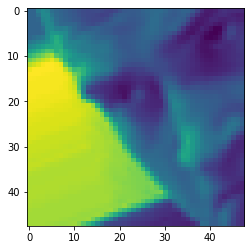

(32, 7)


IndexError: ignored

In [30]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from matplotlib import pyplot as plt


In [31]:
checkpoint = ModelCheckpoint('Emotion_little_vgg.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]
print(train_generator)
history=model.fit(train_generator,epochs=30,batch_size=70,validation_data=validation_generator)

Epoch 1/30
898/898 [==============================] - 17s 19ms/step - loss: 2.1583 - accuracy: 0.1929 - val_loss: 1.7874 - val_accuracy: 0.2519
Epoch 2/30
898/898 [==============================] - 17s 18ms/step - loss: 1.8217 - accuracy: 0.2395 - val_loss: 1.7712 - val_accuracy: 0.2633
Epoch 3/30
898/898 [==============================] - 17s 18ms/step - loss: 1.7943 - accuracy: 0.2515 - val_loss: 1.7628 - val_accuracy: 0.2600
Epoch 4/30
898/898 [==============================] - 17s 18ms/step - loss: 1.7824 - accuracy: 0.2606 - val_loss: 1.7899 - val_accuracy: 0.2522
Epoch 5/30
898/898 [==============================] - 17s 19ms/step - loss: 1.7444 - accuracy: 0.2842 - val_loss: 1.6868 - val_accuracy: 0.3098
Epoch 6/30
898/898 [==============================] - 17s 19ms/step - loss: 1.6869 - accuracy: 0.3129 - val_loss: 1.5587 - val_accuracy: 0.3937
Epoch 7/30
898/898 [==============================] - 17s 18ms/step - loss: 1.5975 - accuracy: 0.3667 - val_loss: 1.4316 - val_accuracy:

In [45]:
test_x_a=np.expand_dims(test_x_a,axis=0)
test_x_a=np.reshape(test_x_a,(3589,48,48,1))

In [64]:
print(test_x_a.shape)
print(model.evaluate(test_x_a,y_testing,batch_size=32))
result=model.predict(test_x_a,32)

(3589, 48, 48, 1)
113/113 [==============================] - 1s 6ms/step - loss: 17.9601 - accuracy: 0.1691
[17.960126876831055, 0.16912789642810822]


(array([2]),)
	(array([0]),)


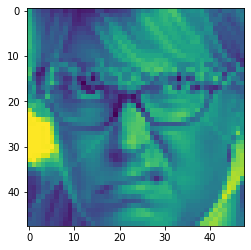

(array([2]),)
	(array([5]),)


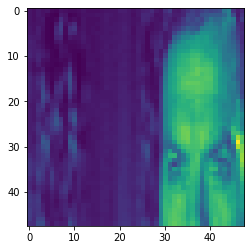

(array([2]),)
	(array([6]),)


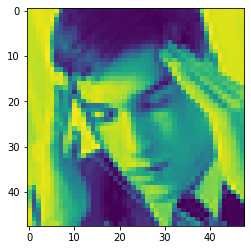

(array([2]),)
	(array([4]),)


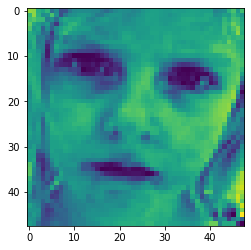

(array([2]),)
	(array([2]),)


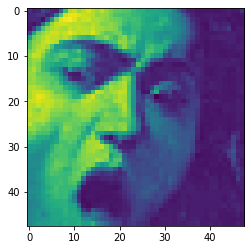

(array([2]),)
	(array([0]),)


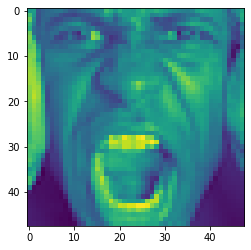

(array([2]),)
	(array([4]),)


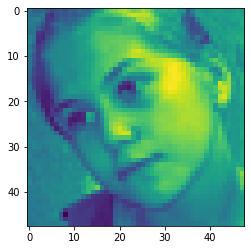

(array([2]),)
	(array([3]),)


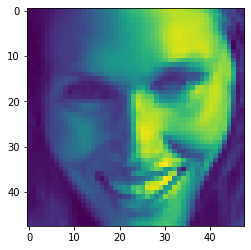

(array([2]),)
	(array([0]),)


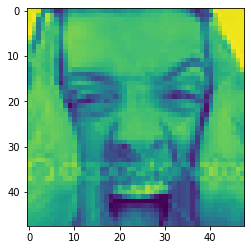

(array([2]),)
	(array([3]),)


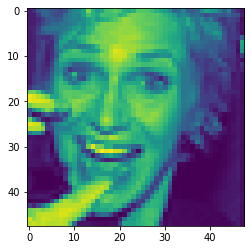

(array([5]),)
	(array([5]),)


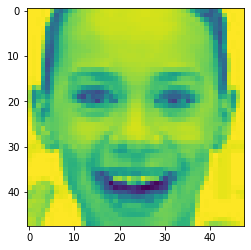

(array([2]),)
	(array([3]),)


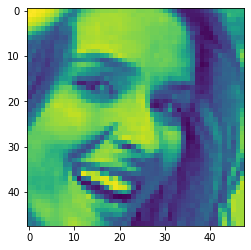

(array([2]),)
	(array([4]),)


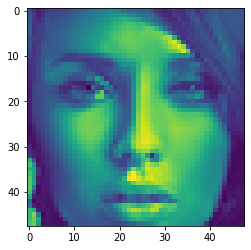

(array([2]),)
	(array([4]),)


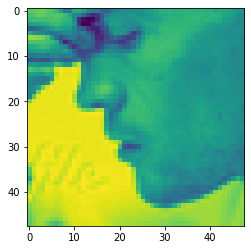

(array([2]),)
	(array([0]),)


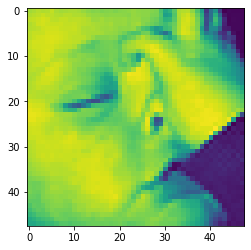

(array([2]),)
	(array([6]),)


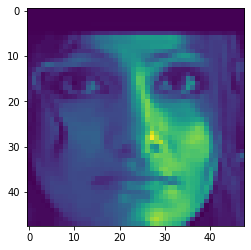

(array([2]),)
	(array([2]),)


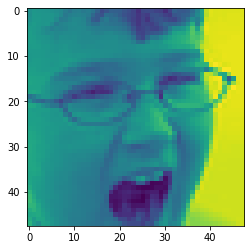

(array([2]),)
	(array([5]),)


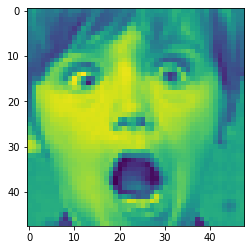

(array([2]),)
	(array([4]),)


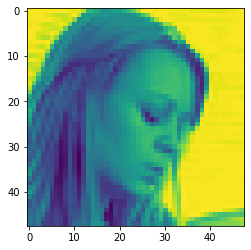

(array([2]),)
	(array([2]),)


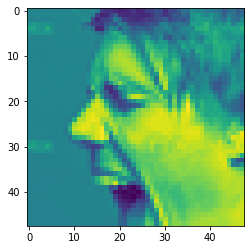

(array([2]),)
	(array([3]),)


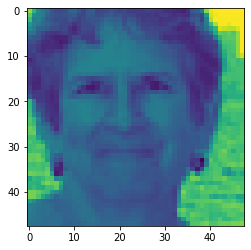

(array([2]),)
	(array([6]),)


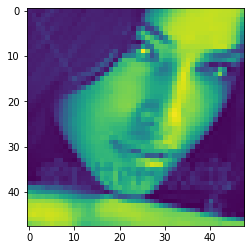

(array([2]),)
	(array([0]),)


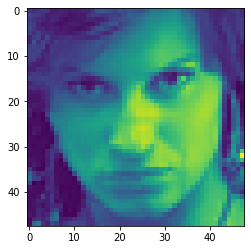

(array([2]),)
	(array([6]),)


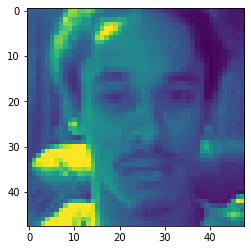

(array([2]),)
	(array([3]),)


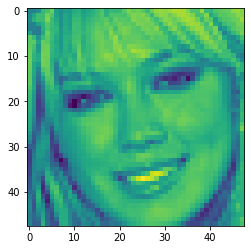

(array([2]),)
	(array([2]),)


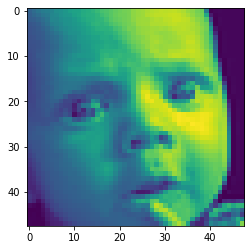

(array([5]),)
	(array([5]),)


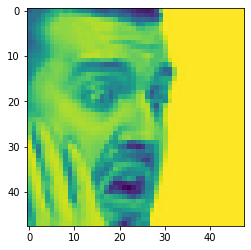

(array([5]),)
	(array([6]),)


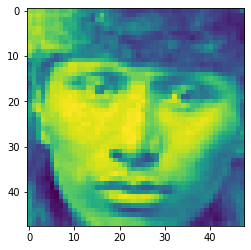

(array([5]),)
	(array([6]),)


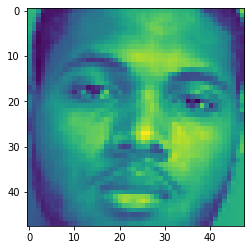

(array([2]),)
	(array([3]),)


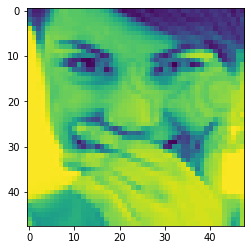

(array([2]),)
	(array([4]),)


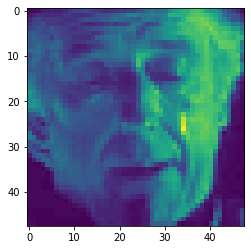

(array([2]),)
	(array([6]),)


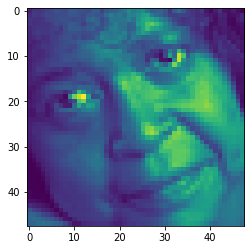

(array([2]),)
	(array([6]),)


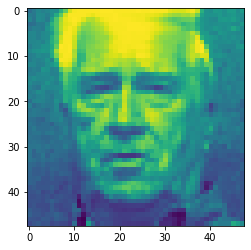

(array([5]),)
	(array([0]),)


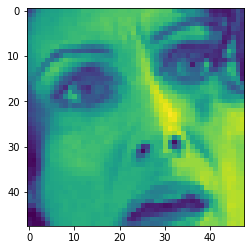

(array([2]),)
	(array([1]),)


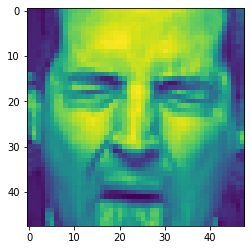

(array([2]),)
	(array([3]),)


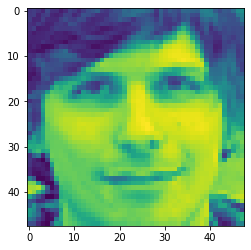

(array([5]),)
	(array([5]),)


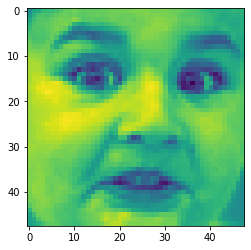

(array([2]),)
	(array([0]),)


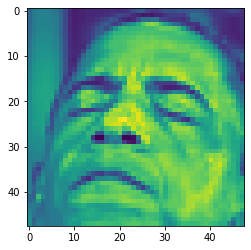

(array([2]),)
	(array([0]),)


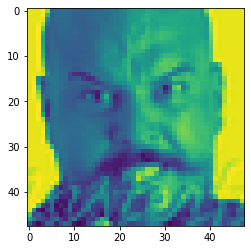

(array([2]),)
	(array([4]),)


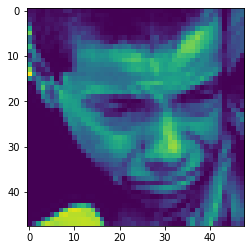

(array([2]),)
	(array([6]),)


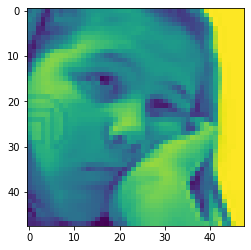

(array([2]),)
	(array([4]),)


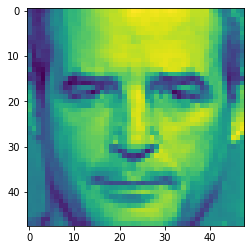

(array([2]),)
	(array([2]),)


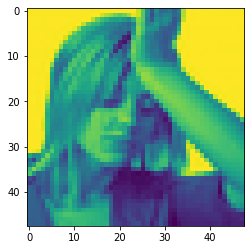

(array([2]),)
	(array([4]),)


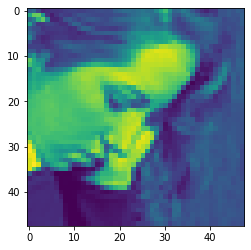

(array([2]),)
	(array([2]),)


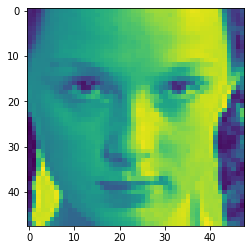

(array([2]),)
	(array([4]),)


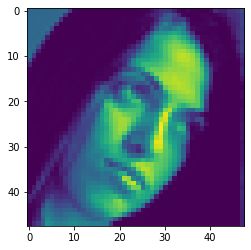

(array([2]),)
	(array([3]),)


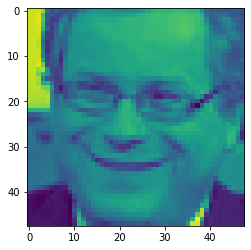

(array([2]),)
	(array([6]),)


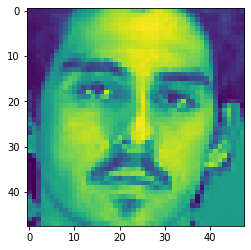

(array([2]),)
	(array([3]),)


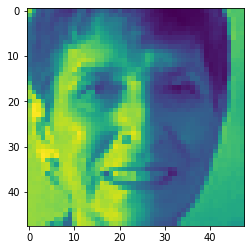

(array([2]),)
	(array([3]),)


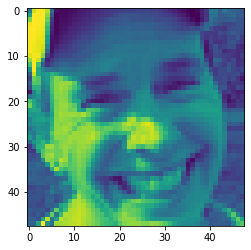

(array([2]),)
	(array([4]),)


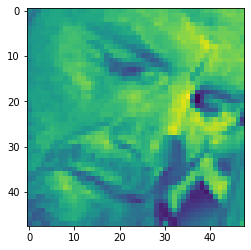

(array([2]),)
	(array([2]),)


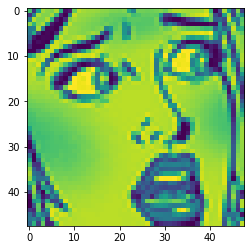

(array([5]),)
	(array([3]),)


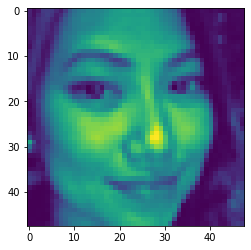

(array([2]),)
	(array([2]),)


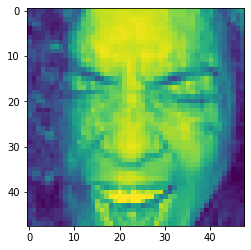

(array([5]),)
	(array([0]),)


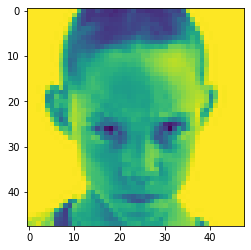

(array([2]),)
	(array([4]),)


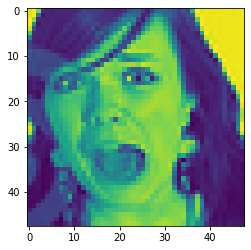

(array([5]),)
	(array([3]),)


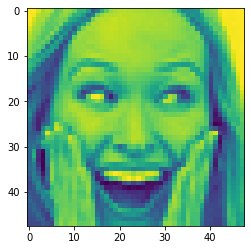

(array([2]),)
	(array([6]),)


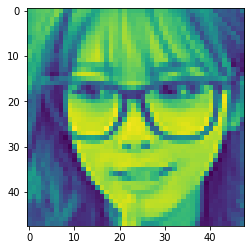

(array([2]),)
	(array([6]),)


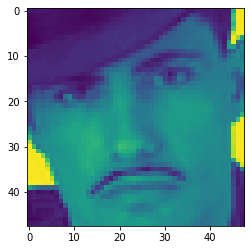

(array([2]),)
	(array([2]),)


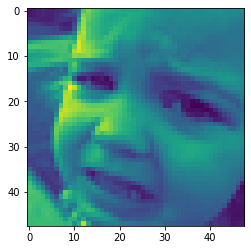

(array([2]),)
	(array([6]),)


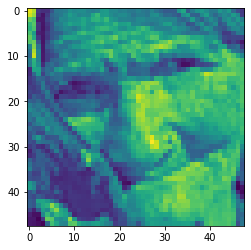

(array([2]),)
	(array([4]),)


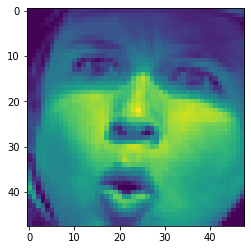

(array([2]),)
	(array([6]),)


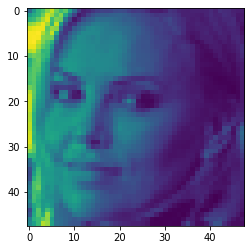

(array([2]),)
	(array([3]),)


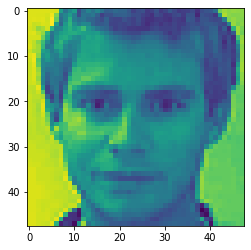

(array([2]),)
	(array([0]),)


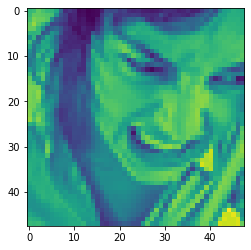

(array([2]),)
	(array([0]),)


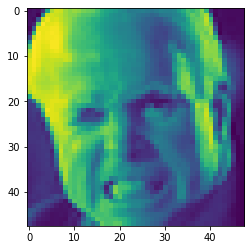

(array([2]),)
	(array([3]),)


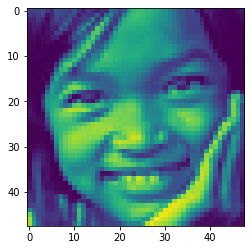

(array([5]),)
	(array([5]),)


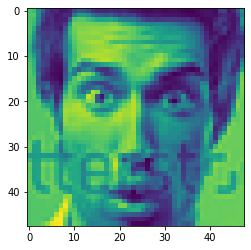

(array([6]),)
	(array([6]),)


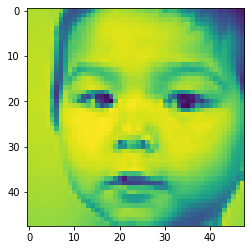

(array([2]),)
	(array([0]),)


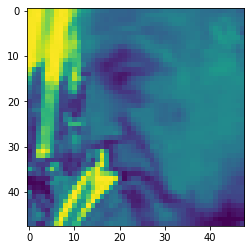

(array([2]),)
	(array([2]),)


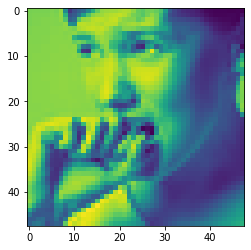

(array([2]),)
	(array([5]),)


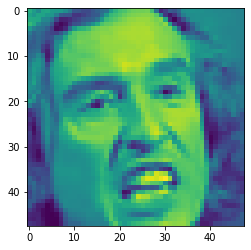

(array([5]),)
	(array([5]),)


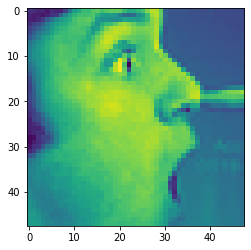

(array([2]),)
	(array([6]),)


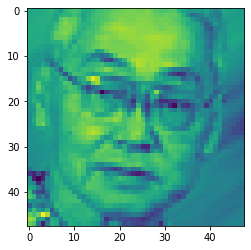

(array([2]),)
	(array([3]),)


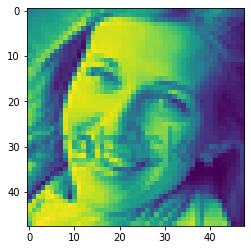

(array([2]),)
	(array([0]),)


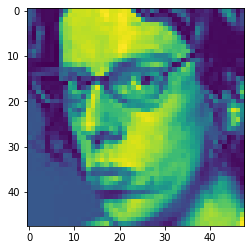

(array([2]),)
	(array([6]),)


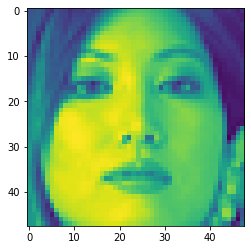

(array([2]),)
	(array([0]),)


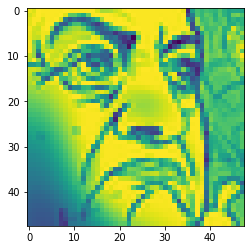

(array([2]),)
	(array([5]),)


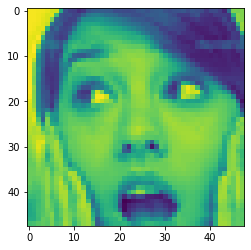

(array([2]),)
	(array([3]),)


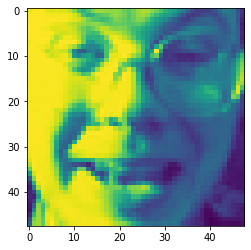

(array([2]),)
	(array([2]),)


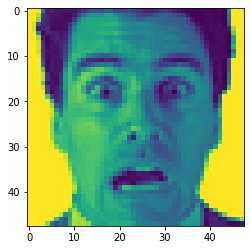

(array([2]),)
	(array([3]),)


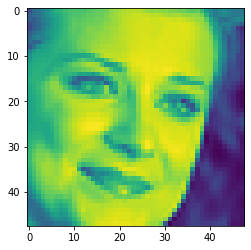

(array([5]),)
	(array([5]),)


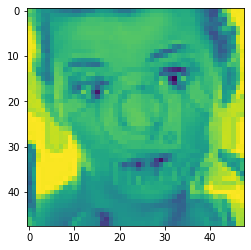

(array([2]),)
	(array([6]),)


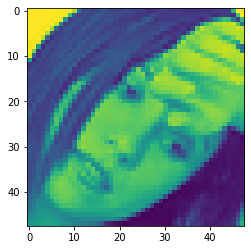

(array([2]),)
	(array([3]),)


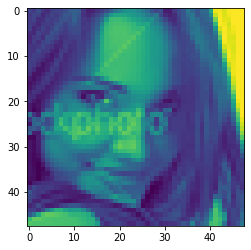

(array([2]),)
	(array([4]),)


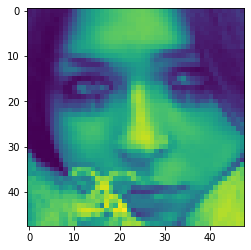

(array([2]),)
	(array([6]),)


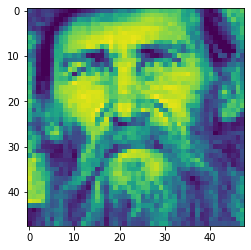

(array([2]),)
	(array([2]),)


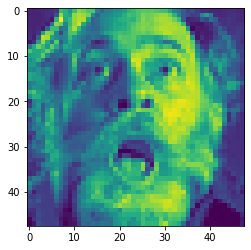

(array([2]),)
	(array([3]),)


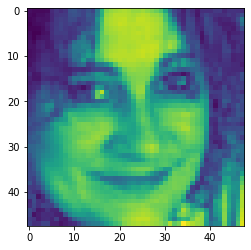

(array([2]),)
	(array([3]),)


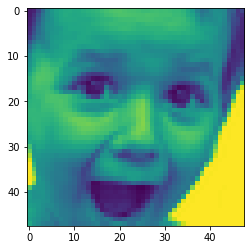

(array([2]),)
	(array([3]),)


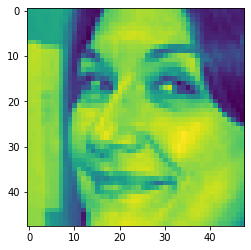

(array([2]),)
	(array([2]),)


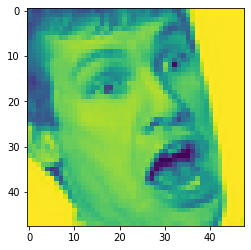

(array([2]),)
	(array([4]),)


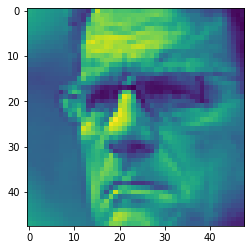

(array([2]),)
	(array([6]),)


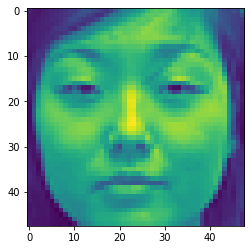

(array([5]),)
	(array([6]),)


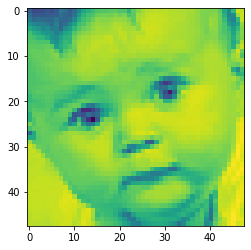

(array([2]),)
	(array([4]),)


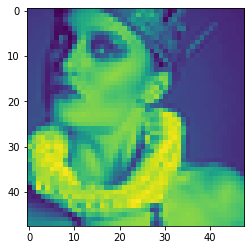

(array([2]),)
	(array([4]),)


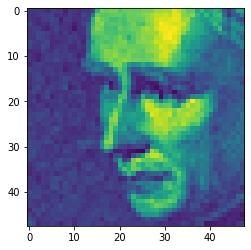

(array([2]),)
	(array([5]),)


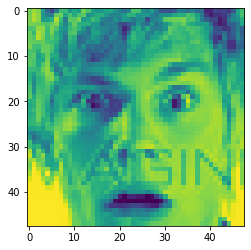

(array([2]),)
	(array([4]),)


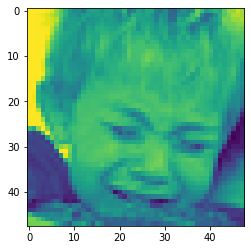

(array([2]),)
	(array([6]),)


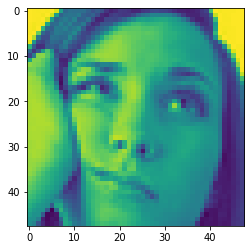

In [63]:
for ind in range(100):
  res=np.where(result[ind]==np.max(result[ind]))
  print(res)
  print('\t'+str(np.where(y_testing[ind]==np.max(y_testing[ind]))))
  plt.imshow(test_x_a[ind,:,:,0])
  plt.show()